# Preprocessing and clustering - Liver Cell Atlas All cells StSt Mouse

 (https://www.livercellatlas.org/umap-ststmouseAll.php)

In [1]:
import os
# !os.mkdir("../Data/ATLAS/MouseStSt/All_cells/write")

In [59]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.10


In [4]:
results_file_all = '../Data/ATLAS/MouseStSt/All_cells/write/MouseStSt_All.h5ad'  # the file that will store the analysis results

Read in the count matrix into an [AnnData](https://anndata.readthedocs.io/en/latest/anndata.AnnData.html) object, which holds many slots for annotations and different representations of the data. It also comes with its own HDF5-based file format: `.h5ad`.

In [5]:
adata_all = sc.read_10x_mtx(
    '../Data/ATLAS/MouseStSt/All_cells/countTable_mouseStSt/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/..-Data-ATLAS-MouseStSt-All_cells-countTable_mouseStSt-matrix.h5ad


In [6]:
adata_all.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [7]:
adata_all_raw = adata_all.copy()
adata_all_raw

AnnData object with n_obs × n_vars = 389056 × 31053
    var: 'gene_ids'

## Preprocessing

Show those genes that yield the highest fraction of counts in each single cell, across all cells.

normalizing counts per cell
    finished (0:00:02)


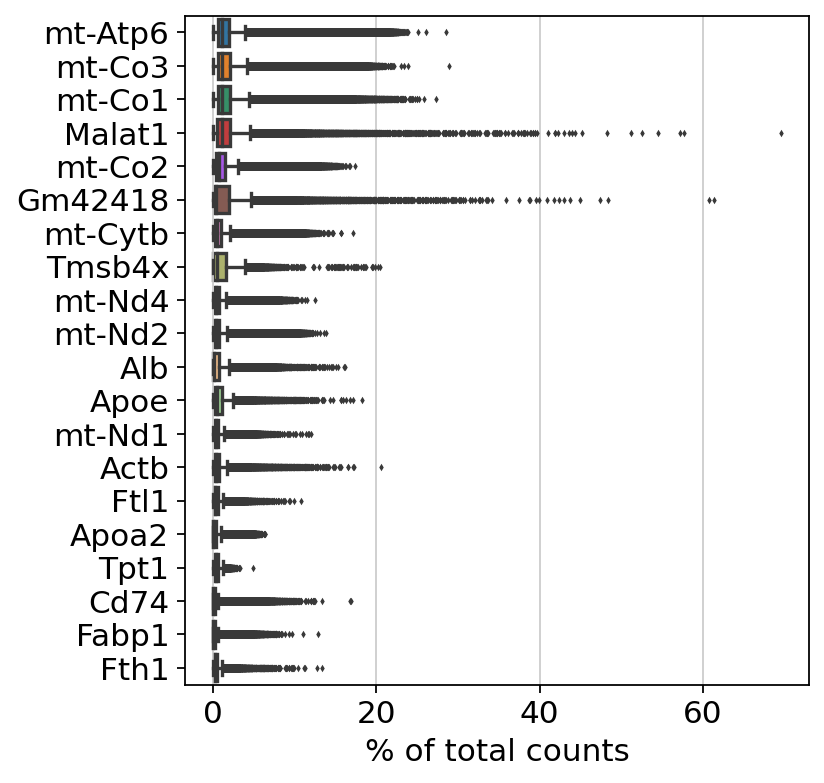

In [8]:
sc.pl.highest_expr_genes(adata_all, n_top=20, )

Basic filtering:

In [9]:
# sc.pp.filter_cells(adata_all, min_genes=200)
sc.pp.filter_genes(adata_all, min_cells=3)

filtered out 5021 genes that are detected in less than 3 cells


Let's assemble some information about mitochondrial genes, which are important for quality control.

Citing from "Simple Single Cell" workflows [(Lun, McCarthy & Marioni, 2017)](https://master.bioconductor.org/packages/release/workflows/html/simpleSingleCell.html#examining-gene-level-metrics):

> High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

In [10]:
adata_all_raw

AnnData object with n_obs × n_vars = 389056 × 31053
    var: 'gene_ids'

In [11]:
adata_all

AnnData object with n_obs × n_vars = 389056 × 26032
    var: 'gene_ids', 'n_cells'

Loading the UMAP from the Liver Cell Atlas [(Cell, M.Guilliams & C.Scott et al., 2022)](https://www.cell.com/cell/fulltext/S0092-8674(21)01481-1):

> Spatial proteogenomics reveals distinct and evolutionarily conserved hepatic macrophage niches

In [14]:
umap_all = pd.read_csv('../Data/ATLAS/MouseStSt/All_cells/annot_mouseStStAll.csv')
umap_cd45neg = pd.read_csv('../Data/ATLAS/MouseStSt/CD45neg/annot_mouseStStCD45neg.csv')
umap_myeloid = pd.read_csv('../Data/ATLAS/MouseStSt/Myeloid/annot_mouseStStMyeloid.csv')
umap_all.index = umap_all.index.astype(str)
umap_cd45neg.index = umap_cd45neg.index.astype(str)
umap_myeloid.index = umap_myeloid.index.astype(str)

In [15]:
umap_all

UMAP_1    UMAP_2  cluster        annot  sample  \
0       10.199693 -7.500118       21      T cells  CISE12   
1       12.429611 -5.372781       11      T cells  CISE12   
2       14.550602 -2.247851       26        ILC1s  CISE12   
3       11.260082 -5.692209       11      T cells  CISE12   
4       13.879457 -1.479918       26        ILC1s  CISE12   
...           ...       ...      ...          ...     ...   
185889   7.300422 -5.189817       19  Neutrophils    CS16   
185890   5.629435 -6.119583       19  Neutrophils    CS16   
185891   6.191045 -5.096178       19  Neutrophils    CS16   
185892   6.637616 -5.062717       19  Neutrophils    CS16   
185893   7.274597 -5.612700       19  Neutrophils    CS16   

                       cell  digest typeSample  
0        AAACCTGAGTTCGCGC-1  exVivo    citeSeq  
1        AAACCTGGTGAGGCTA-1  exVivo    citeSeq  
2        AAACCTGTCGGTGTCG-1  exVivo    citeSeq  
3        AAACGGGAGTACGCGA-1  exVivo    citeSeq  
4        AAACGGGCAGTATGCT-1  exVivo    citeSeq  
...                     ...     ...        ...  
185889  TTCTTAGCACATAACC-46  exVivo   scRnaSeq  
185890  TTGAACGAGTGAAGTT-46  exVivo   scRnaSeq  
185891  TTGACTTTCCAATGGT-46  exVivo   scRnaSeq  
185892  TTGTAGGTCACTCCTG-46  exVivo   scRnaSeq  
185893  TTTCCTCTCAGCATGT-46  exVivo   scRnaSeq  

[185894 rows x 8 columns]

In [16]:
umap_cd45neg

UMAP_1    UMAP_2  cluster               annot sample  \
0       8.016582  2.510677        1               LSECs   CS48   
1      11.141941 -2.581428        0               LSECs   CS48   
2       7.244122 -2.982369        3               LSECs   CS48   
3      10.271305  2.872195        1               LSECs   CS48   
4       8.165704  2.204126       24               LSECs   CS48   
...          ...       ...      ...                 ...    ...   
83405   1.226525 -8.451127       30      Cholangiocytes  ABU21   
83406  -1.546854 -5.852131       31               HsPCs  ABU21   
83407  -4.857756  9.484549       22  Hepatocytes NucSeq  ABU21   
83408   1.204025 -8.450934       30      Cholangiocytes  ABU21   
83409   1.342838 -8.332494       30      Cholangiocytes  ABU21   

                      cell  digest typeSample  
0       AAACGAATCCACTTCG-2  inVivo   scRnaSeq  
1       AAAGGTACAGGAAGTC-2  inVivo   scRnaSeq  
2       AACTTCTGTCATGGCC-2  inVivo   scRnaSeq  
3       AATGGCTCAACGGTAG-2  inVivo   scRnaSeq  
4       ACACTGAAGTGCAGGT-2  inVivo   scRnaSeq  
...                    ...     ...        ...  
83405  TTTGGAGTCTGGCTGG-38  nuclei     nucSeq  
83406  TTTGGTTCACTGAGGA-38  nuclei     nucSeq  
83407  TTTGTTGGTGATACAA-38  nuclei     nucSeq  
83408  TTTGTTGTCATGCAGT-38  nuclei     nucSeq  
83409  TTTGTTGTCTGGAAGG-38  nuclei     nucSeq  

[83410 rows x 8 columns]

In [17]:
umap_myeloid

UMAP_1     UMAP_2  cluster                   annot  sample  \
0      -1.714325  -4.307739        4                     KCs  CISE12   
1      -7.102730  11.081320       31  Peritoneal Macrophages  CISE12   
2       3.779955  12.566820       19      Trans. Monocytes 2  CISE12   
3       5.230834  15.590258       14               Monocytes  CISE12   
4       6.627445  15.309771        0               Monocytes  CISE12   
...          ...        ...      ...                     ...     ...   
71256  12.224661  -1.257659        8                   cDC1s    CS16   
71257  13.142634   0.208537       40                   cDC1s    CS16   
71258  11.447091  -0.682425       23                   cDC1s    CS16   
71259   7.810771   8.106428       44                   cDC2s    CS16   
71260   8.571356   6.910616       37                   cDC2s    CS16   

                      cell  digest typeSample  
0       AAACCTGAGCTAGTCT-1  exVivo    citeSeq  
1       AAACCTGCATAGGATA-1  exVivo    citeSeq  
2       AAACCTGGTATGAATG-1  exVivo    citeSeq  
3       AAACCTGGTCAGTGGA-1  exVivo    citeSeq  
4       AAACGGGGTAGCGATG-1  exVivo    citeSeq  
...                    ...     ...        ...  
71256  TTTGGTTGTCAGAATA-46  exVivo   scRnaSeq  
71257  TTTGTCAAGAAAGTGG-46  exVivo   scRnaSeq  
71258  TTTGTCACAGTATGCT-46  exVivo   scRnaSeq  
71259  TTTGTCAGTTGATTGC-46  exVivo   scRnaSeq  
71260  TTTGTCATCCCACTTG-46  exVivo   scRnaSeq  

[71261 rows x 8 columns]

In [18]:
adata_umap_all = sc.AnnData(obs=umap_all)
adata_umap_cd45neg = sc.AnnData(obs=umap_cd45neg)
adata_umap_myeloid = sc.AnnData(obs=umap_myeloid)

/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


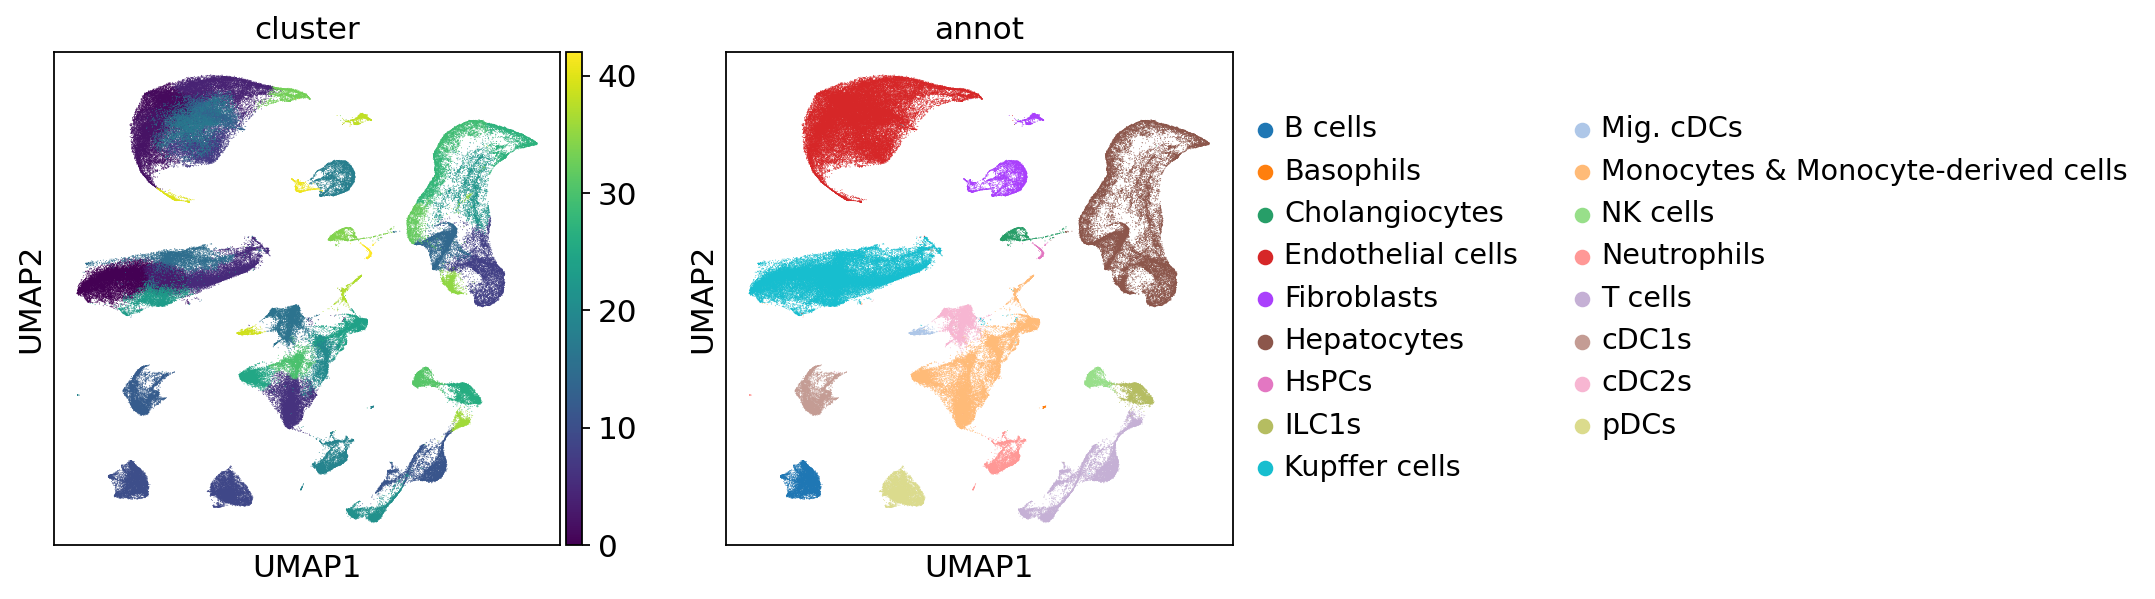

In [19]:
adata_umap_all.obsm['X_umap'] = umap_all[['UMAP_1', 'UMAP_2']].values
sc.pl.embedding(adata_umap_all, basis='umap', color=['cluster', 'annot'])

/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


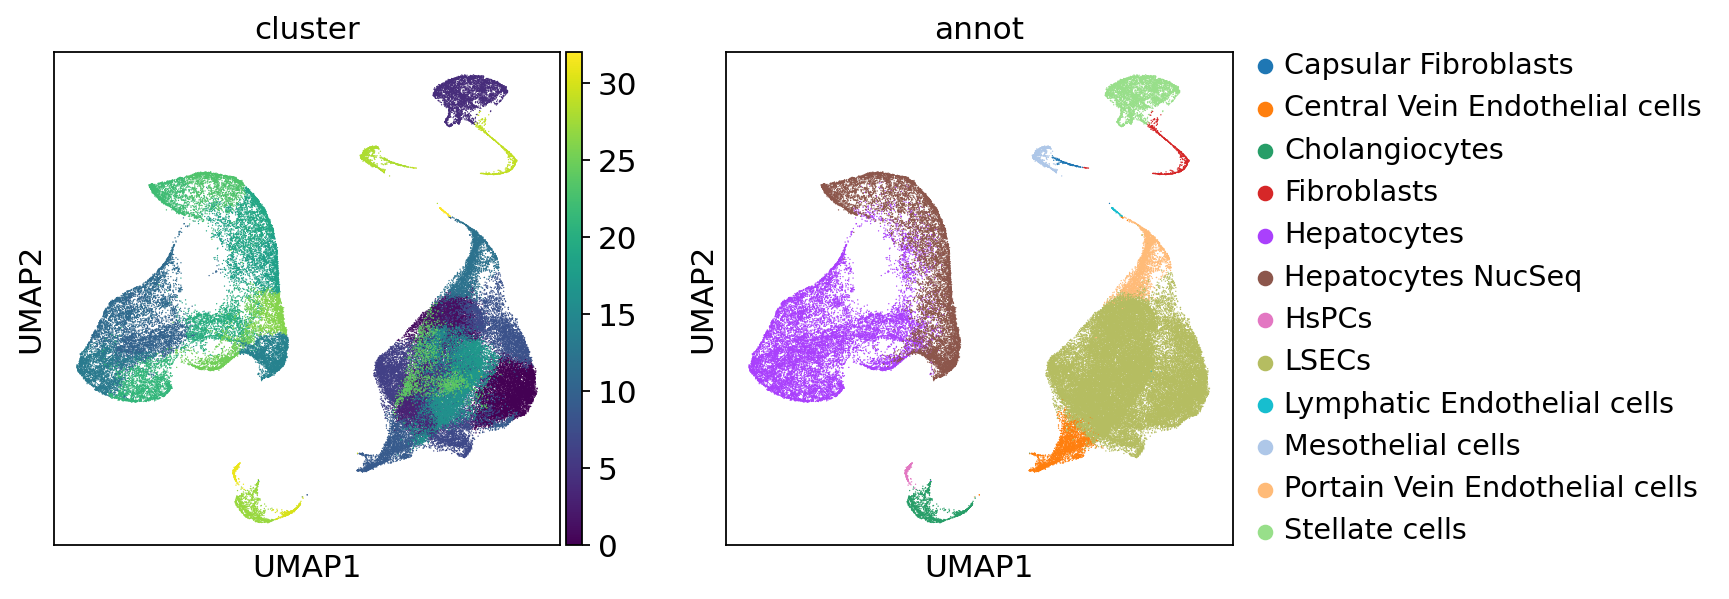

In [20]:
adata_umap_cd45neg.obsm['X_umap'] = umap_cd45neg[['UMAP_1', 'UMAP_2']].values
sc.pl.embedding(adata_umap_cd45neg, basis='umap', color=['cluster', 'annot'])

/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


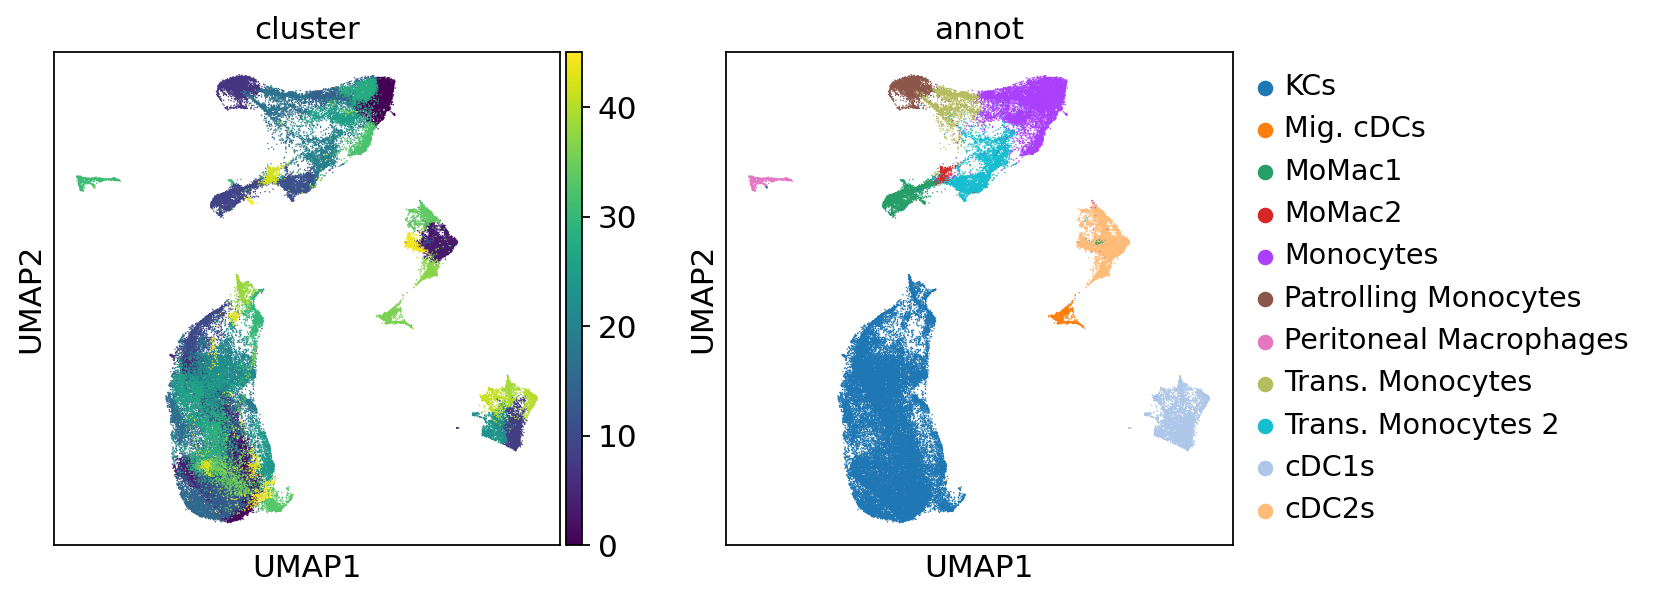

In [21]:
adata_umap_myeloid.obsm['X_umap'] = umap_myeloid[['UMAP_1', 'UMAP_2']].values
sc.pl.embedding(adata_umap_myeloid, basis='umap', color=['cluster', 'annot'])

We re-annotate the All cells UMAP substituting the Fibroblast cells annotations with those in the CD45neg UMAP to annotate Stellate Cells in the all UMAP.
We extract the UMI information for the fibroblast cells in the CD45neg UMAP.

In [22]:
# Subset cd45neg_umap to only include fibroblast cells
fibroblast_umap_all = umap_all[umap_all['annot'] == 'Fibroblasts']
# Extract UMIs for fibroblast cells
fibroblast_cells = set(fibroblast_umap_all['cell'])
fibroblast_umap_cd45neg = umap_cd45neg[umap_cd45neg['cell'].isin(fibroblast_cells)]
fibroblast_umap_cd45neg

UMAP_1     UMAP_2  cluster                           annot sample  \
2167   9.630506  13.861483        4                  Stellate cells   CS52   
2168   8.817458  14.627763        4                  Stellate cells   CS52   
2169   9.848742  14.027792        4                  Stellate cells   CS52   
2170   6.320612  10.775331       28            Capsular Fibroblasts   CS52   
2171   9.384164  13.594571        4                  Stellate cells   CS52   
...         ...        ...      ...                             ...    ...   
81595 -1.391373  -7.079881       27                  Cholangiocytes  ABU21   
81980 -1.412001  -7.197290       27                  Cholangiocytes  ABU21   
82032  8.919876   8.231670       32     Lymphatic Endothelial cells  ABU21   
82058  1.762941  -7.619771       12  Portain Vein Endothelial cells  ABU21   
82164  6.010620  10.221121       28               Mesothelial cells  ABU21   

                      cell  digest typeSample  
2167    AAAGGATGTCTACAGT-3  inVivo   scRnaSeq  
2168    AACCAACGTGCCTACG-3  inVivo   scRnaSeq  
2169    AAGCGAGCATTCTCCG-3  inVivo   scRnaSeq  
2170    AATTTCCTCCGGTAAT-3  inVivo   scRnaSeq  
2171    ACAAAGACATGGGCAA-3  inVivo   scRnaSeq  
...                    ...     ...        ...  
81595  GACTCTCCATCTAGAC-38  nuclei     nucSeq  
81980  TCGCTCATCTTCTGGC-38  nuclei     nucSeq  
82032  TGATTTCTCTGATGGT-38  nuclei     nucSeq  
82058  TGGGAGACACGCGTCA-38  nuclei     nucSeq  
82164  TTGTTCATCCTACACC-38  nuclei     nucSeq  

[5422 rows x 8 columns]

In [23]:
# Extract only the UMI corresponding to Stellate cells from the CD45neg UMAP
stellate_umap_cd45neg = umap_cd45neg[umap_cd45neg['annot'] == 'Stellate cells']
stellate_cells = set(stellate_umap_cd45neg['cell'])
stellate_umap_cd45neg

UMAP_1     UMAP_2  cluster           annot sample  \
2167    9.630506  13.861483        4  Stellate cells   CS52   
2168    8.817458  14.627763        4  Stellate cells   CS52   
2169    9.848742  14.027792        4  Stellate cells   CS52   
2171    9.384164  13.594571        4  Stellate cells   CS52   
2173   10.048538  13.640543        4  Stellate cells   CS52   
...          ...        ...      ...             ...    ...   
81031   9.979309  14.333055        4  Stellate cells  ABU21   
81034  11.708974  15.149199        4  Stellate cells  ABU21   
81035   8.670876  14.632856        4  Stellate cells  ABU21   
81037  10.373777  14.490270        4  Stellate cells  ABU21   
81039  10.814358  14.308881        4  Stellate cells  ABU21   

                      cell  digest typeSample  
2167    AAAGGATGTCTACAGT-3  inVivo   scRnaSeq  
2168    AACCAACGTGCCTACG-3  inVivo   scRnaSeq  
2169    AAGCGAGCATTCTCCG-3  inVivo   scRnaSeq  
2171    ACAAAGACATGGGCAA-3  inVivo   scRnaSeq  
2173    ACCCTTGTCACGTAGT-3  inVivo   scRnaSeq  
...                    ...     ...        ...  
81031  TTTCAGTGTGGCCACT-38  nuclei     nucSeq  
81034  TTTGATCAGGCTATCT-38  nuclei     nucSeq  
81035  TTTGATCCACTTCAGA-38  nuclei     nucSeq  
81037  TTTGGTTTCAGCGTCG-38  nuclei     nucSeq  
81039  TTTGTTGGTTAGAAAC-38  nuclei     nucSeq  

[3869 rows x 8 columns]

In [24]:
# Extract only the UMI corresponding to LSECs from the CD45neg UMAP
LSEC_umap_cd45neg = umap_cd45neg[umap_cd45neg['annot'] == 'LSECs']
LSEC_cells = set(LSEC_umap_cd45neg['cell'])
LSEC_umap_cd45neg

UMAP_1    UMAP_2  cluster  annot sample                 cell  \
0       8.016582  2.510677        1  LSECs   CS48   AAACGAATCCACTTCG-2   
1      11.141941 -2.581428        0  LSECs   CS48   AAAGGTACAGGAAGTC-2   
2       7.244122 -2.982369        3  LSECs   CS48   AACTTCTGTCATGGCC-2   
3      10.271305  2.872195        1  LSECs   CS48   AATGGCTCAACGGTAG-2   
4       8.165704  2.204126       24  LSECs   CS48   ACACTGAAGTGCAGGT-2   
...          ...       ...      ...    ...    ...                  ...   
82184   8.767885  0.598218       15  LSECs  ABU21  TTTGGAGGTCAAAGTA-38   
82186   9.413693 -2.696046       16  LSECs  ABU21  TTTGGTTGTACCTAAC-38   
82187   9.273297  1.111511       15  LSECs  ABU21  TTTGTTGAGAAGCTCG-38   
82188   9.350511  1.710292        1  LSECs  ABU21  TTTGTTGAGACTTCAC-38   
82189   8.846643 -2.972621       16  LSECs  ABU21  TTTGTTGAGCCTGTCG-38   

       digest typeSample  
0      inVivo   scRnaSeq  
1      inVivo   scRnaSeq  
2      inVivo   scRnaSeq  
3      inVivo   scRnaSeq  
4      inVivo   scRnaSeq  
...       ...        ...  
82184  nuclei     nucSeq  
82186  nuclei     nucSeq  
82187  nuclei     nucSeq  
82188  nuclei     nucSeq  
82189  nuclei     nucSeq  

[44492 rows x 8 columns]

In [25]:
# Extract only the UMI corresponding to Monocytes from the Myeloid UMAP
Mono_umap_myeloid = umap_myeloid[umap_myeloid['annot'] == 'Monocytes']
Mono_cells = set(Mono_umap_myeloid['cell'])
Mono_umap_myeloid

UMAP_1     UMAP_2  cluster      annot  sample                 cell  \
3      5.230834  15.590258       14  Monocytes  CISE12   AAACCTGGTCAGTGGA-1   
4      6.627445  15.309771        0  Monocytes  CISE12   AAACGGGGTAGCGATG-1   
7      3.917890  14.374444       25  Monocytes  CISE12   AAAGCAAAGTCGTTTG-1   
10     5.191591  14.563597        0  Monocytes  CISE12   AAAGTAGAGGATATAC-1   
11     5.968249  15.197681        0  Monocytes  CISE12   AAAGTAGGTGCAGACA-1   
...         ...        ...      ...        ...     ...                  ...   
70797  5.681736  13.281348       32  Monocytes    CS16  TAGCCGGAGTACATGA-46   
70911  5.028715  14.874337       28  Monocytes    CS16  TCGCGAGCACACTGCG-46   
70948  4.517963  13.734126       25  Monocytes    CS16  TCTCATACAGCCACCA-46   
71026  6.582953  15.770535        0  Monocytes    CS16  TGCACCTCACGTAAGG-46   
71036  5.580112  12.770759       32  Monocytes    CS16  TGCCAAATCATATCGG-46   

       digest typeSample  
3      exVivo    citeSeq  
4      exVivo    citeSeq  
7      exVivo    citeSeq  
10     exVivo    citeSeq  
11     exVivo    citeSeq  
...       ...        ...  
70797  exVivo   scRnaSeq  
70911  exVivo   scRnaSeq  
70948  exVivo   scRnaSeq  
71026  exVivo   scRnaSeq  
71036  exVivo   scRnaSeq  

[8727 rows x 8 columns]

In [27]:
merged_HSCandLSECandMono = pd.concat([stellate_umap_cd45neg, LSEC_umap_cd45neg, Mono_umap_myeloid], axis=0)

In [28]:
merged_HSCandLSECandMono

UMAP_1     UMAP_2  cluster           annot sample  \
2167    9.630506  13.861483        4  Stellate cells   CS52   
2168    8.817458  14.627763        4  Stellate cells   CS52   
2169    9.848742  14.027792        4  Stellate cells   CS52   
2171    9.384164  13.594571        4  Stellate cells   CS52   
2173   10.048538  13.640543        4  Stellate cells   CS52   
...          ...        ...      ...             ...    ...   
70797   5.681736  13.281348       32       Monocytes   CS16   
70911   5.028715  14.874337       28       Monocytes   CS16   
70948   4.517963  13.734126       25       Monocytes   CS16   
71026   6.582953  15.770535        0       Monocytes   CS16   
71036   5.580112  12.770759       32       Monocytes   CS16   

                      cell  digest typeSample  
2167    AAAGGATGTCTACAGT-3  inVivo   scRnaSeq  
2168    AACCAACGTGCCTACG-3  inVivo   scRnaSeq  
2169    AAGCGAGCATTCTCCG-3  inVivo   scRnaSeq  
2171    ACAAAGACATGGGCAA-3  inVivo   scRnaSeq  
2173    ACCCTTGTCACGTAGT-3  inVivo   scRnaSeq  
...                    ...     ...        ...  
70797  TAGCCGGAGTACATGA-46  exVivo   scRnaSeq  
70911  TCGCGAGCACACTGCG-46  exVivo   scRnaSeq  
70948  TCTCATACAGCCACCA-46  exVivo   scRnaSeq  
71026  TGCACCTCACGTAAGG-46  exVivo   scRnaSeq  
71036  TGCCAAATCATATCGG-46  exVivo   scRnaSeq  

[57088 rows x 8 columns]

In [29]:
merged = umap_all.merge(merged_HSCandLSECandMono[['cell', 'annot']], on='cell', how='left', suffixes=('', '_other'))
merged['annot'] = merged['annot_other'].fillna(merged['annot'])
merged.drop('annot_other', axis=1, inplace=True)
umap_all = merged

In [30]:
umap_all

UMAP_1    UMAP_2  cluster        annot  sample  \
0       10.199693 -7.500118       21      T cells  CISE12   
1       12.429611 -5.372781       11      T cells  CISE12   
2       14.550602 -2.247851       26        ILC1s  CISE12   
3       11.260082 -5.692209       11      T cells  CISE12   
4       13.879457 -1.479918       26        ILC1s  CISE12   
...           ...       ...      ...          ...     ...   
185889   7.300422 -5.189817       19  Neutrophils    CS16   
185890   5.629435 -6.119583       19  Neutrophils    CS16   
185891   6.191045 -5.096178       19  Neutrophils    CS16   
185892   6.637616 -5.062717       19  Neutrophils    CS16   
185893   7.274597 -5.612700       19  Neutrophils    CS16   

                       cell  digest typeSample  
0        AAACCTGAGTTCGCGC-1  exVivo    citeSeq  
1        AAACCTGGTGAGGCTA-1  exVivo    citeSeq  
2        AAACCTGTCGGTGTCG-1  exVivo    citeSeq  
3        AAACGGGAGTACGCGA-1  exVivo    citeSeq  
4        AAACGGGCAGTATGCT-1  exVivo    citeSeq  
...                     ...     ...        ...  
185889  TTCTTAGCACATAACC-46  exVivo   scRnaSeq  
185890  TTGAACGAGTGAAGTT-46  exVivo   scRnaSeq  
185891  TTGACTTTCCAATGGT-46  exVivo   scRnaSeq  
185892  TTGTAGGTCACTCCTG-46  exVivo   scRnaSeq  
185893  TTTCCTCTCAGCATGT-46  exVivo   scRnaSeq  

[185894 rows x 8 columns]

/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


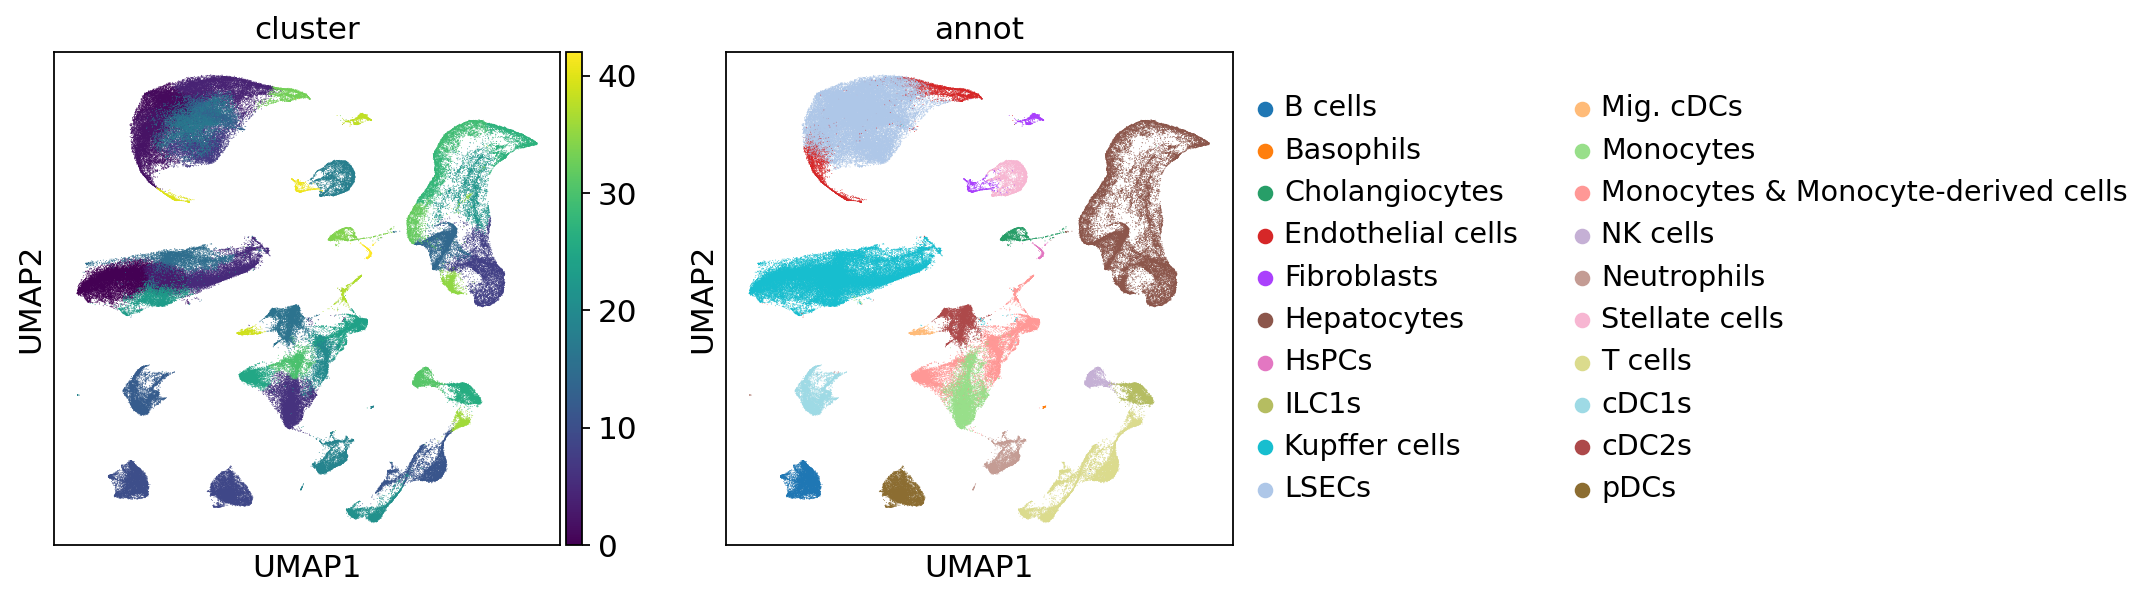

In [58]:
adata_umap_all = sc.AnnData(obs=umap_all)
adata_umap_all.obsm['X_umap'] = umap_all[['UMAP_1', 'UMAP_2']].values
sc.pl.embedding(adata_umap_all, basis='umap', color=['cluster', 'annot'])

/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


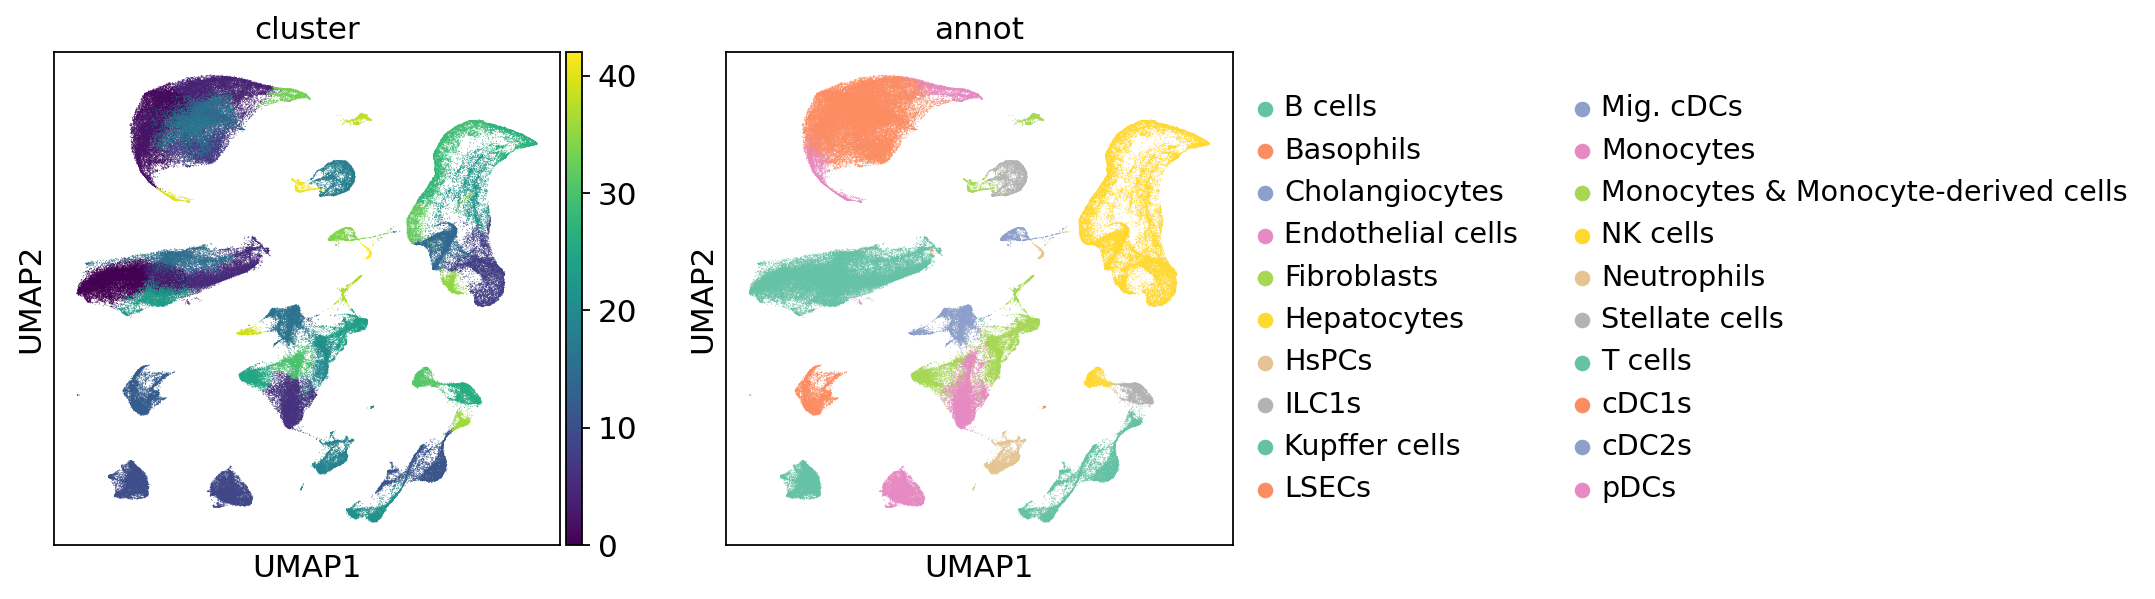

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

# Define a custom color palette using seaborn
custom_palette = sns.color_palette('Set2', n_colors=20)

# Create an AnnData object with UMAP coordinates
adata_umap_all = sc.AnnData(obs=umap_all)
adata_umap_all.obsm['X_umap'] = umap_all[['UMAP_1', 'UMAP_2']].values

# Plot the UMAP with a custom color palette
sc.pl.embedding(adata_umap_all, basis='umap', color=['cluster', 'annot'], palette=custom_palette)

# Show the plot
plt.show()

/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/srv/data/joelpm/miniconda3/envs/newepigenetics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 30000x24000 with 0 Axes>

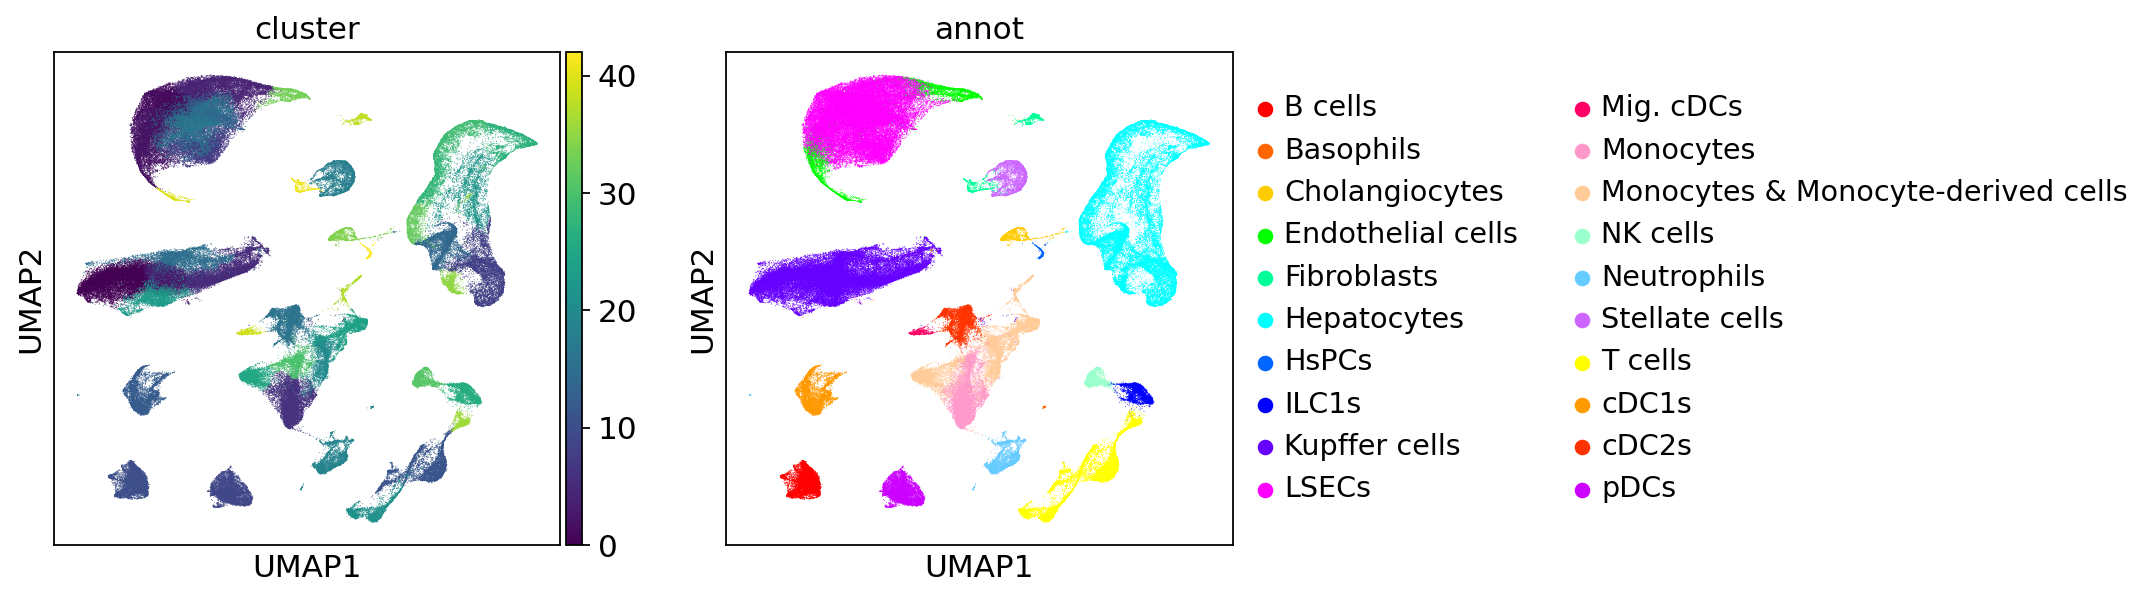

In [67]:
from matplotlib import pyplot as plt
import scanpy as sc

# Define a custom color palette with more vibrant colors
custom_palette = [
    "#FF0000", "#FF6600", "#FFCC00", "#00FF00", "#00FF99",
    "#00FFFF", "#0066FF", "#0000FF", "#6600FF", "#FF00FF",
    "#FF0066", "#FF99CC", "#FFCC99", "#99FFCC", "#66CCFF",
    "#CC66FF", "#FFFF00", "#FF9900", "#FF3300", "#CC00FF"
]

# Create an AnnData object with UMAP coordinates
adata_umap_all = sc.AnnData(obs=umap_all)
adata_umap_all.obsm['X_umap'] = umap_all[['UMAP_1', 'UMAP_2']].values

# Use plt.rc_context() to set figure parameters like size and dpi
with plt.rc_context():
    plt.figure(figsize=(10, 8), dpi=3000)
    sc.pl.embedding(adata_umap_all, basis='umap', color=['cluster', 'annot'], palette=custom_palette, show=False)
    plt.savefig("../Results/plots/umap_all_GRN.png", bbox_inches="tight")

# Show the plot
plt.show()


In [56]:
umap_all.to_csv('../Data/ATLAS/MouseStSt/All_cells/annot_mouseStStAll_withStellateandLSECsandMono.csv',index=False)

## Expression matrix downsampling to UMAP cells (already filtered)

In [33]:
adata_all

AnnData object with n_obs × n_vars = 389056 × 26032
    var: 'gene_ids', 'n_cells'

In [34]:
cell_ids = umap_all['cell'].tolist()
adata_subset = adata_all[adata_all.obs_names.isin(cell_ids)]
adata_all_annot = adata_subset.copy()

In [35]:
adata_all_annot

AnnData object with n_obs × n_vars = 185894 × 26032
    var: 'gene_ids', 'n_cells'

Quality metrics are calculated to filter out mitochondrial genes and normalize the matrix:
* number of genes expressed in the count matrix
* total counts per cell
* percentage of counts in mitochondrial genes

In [36]:
adata_all_annot.var['mt'] = adata_all_annot.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_all_annot, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

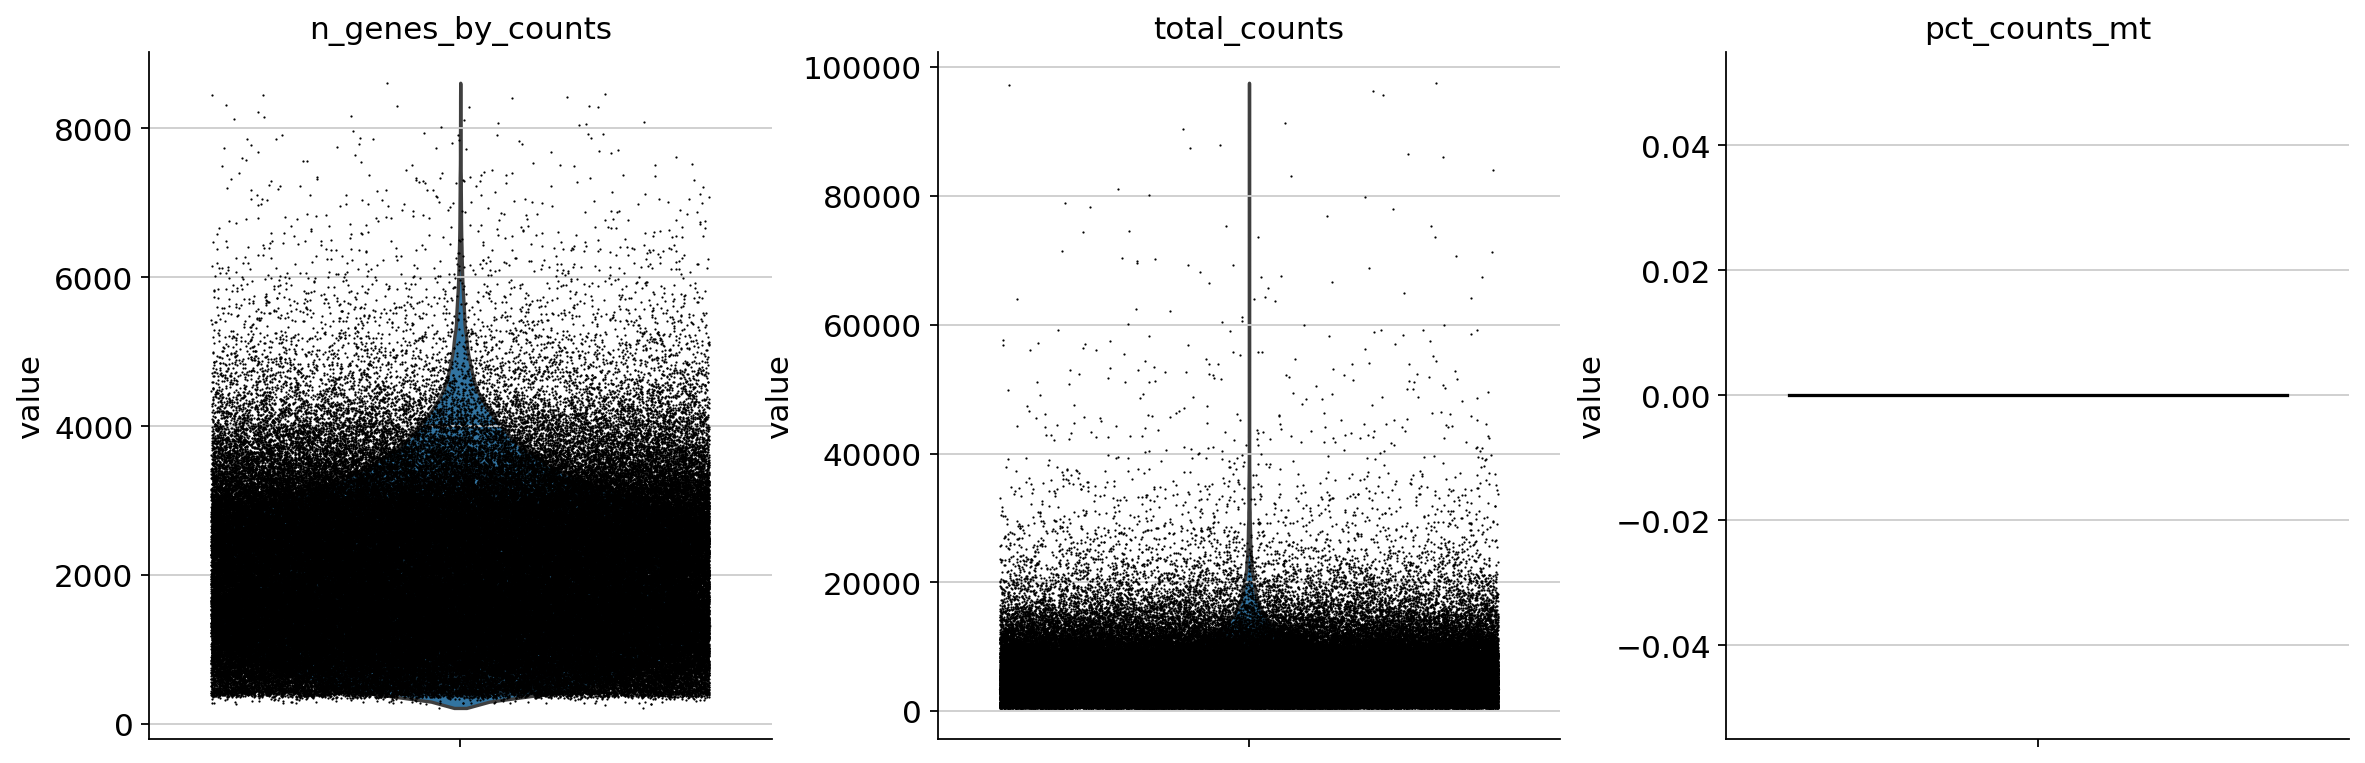

In [37]:
sc.pl.violin(adata_all_annot, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

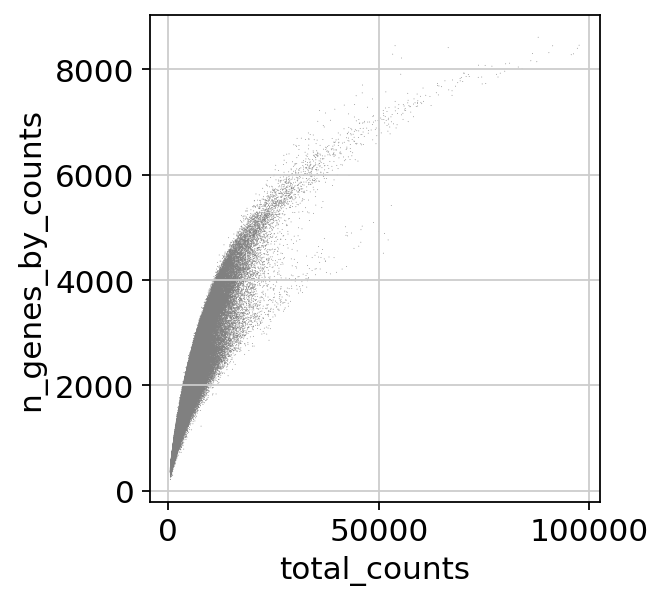

In [38]:
sc.pl.scatter(adata_all_annot, x='total_counts', y='n_genes_by_counts')

The data matrix $\mathbf{X}$ is total-count normalized (library-size corrected) to 10,000 reads per cell in order to make cell counts comparable.

In [39]:
sc.pp.normalize_total(adata_all_annot, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


Scale the data:

In [40]:
sc.pp.log1p(adata_all_annot)

Find high-variable genes:

In [41]:
sc.pp.highly_variable_genes(adata_all_annot, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


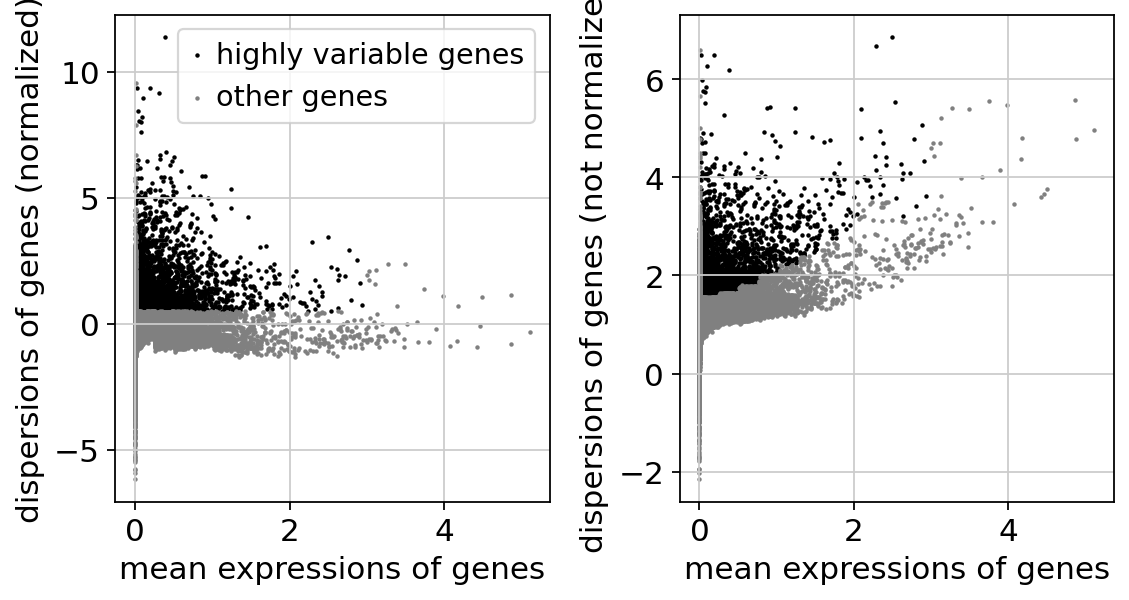

In [42]:
sc.pl.highly_variable_genes(adata_all_annot)

In [43]:
adata_all_annot.raw = adata_all_annot

Filtering:

In [44]:
adata_all_annot = adata_all_annot[:, adata_all_annot.var.highly_variable]

Removing the impact of total counts per cell and the expression level of the majority of mitochondrial genes. Scale the data:

In [45]:
sc.pp.regress_out(adata_all_annot, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:03:12)


In [46]:
sc.pp.scale(adata_all_annot, max_value=10)

In [47]:
adata_all_annot

AnnData object with n_obs × n_vars = 185894 × 2611
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

## Principal component analysis

In [48]:
sc.tl.pca(adata_all_annot, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


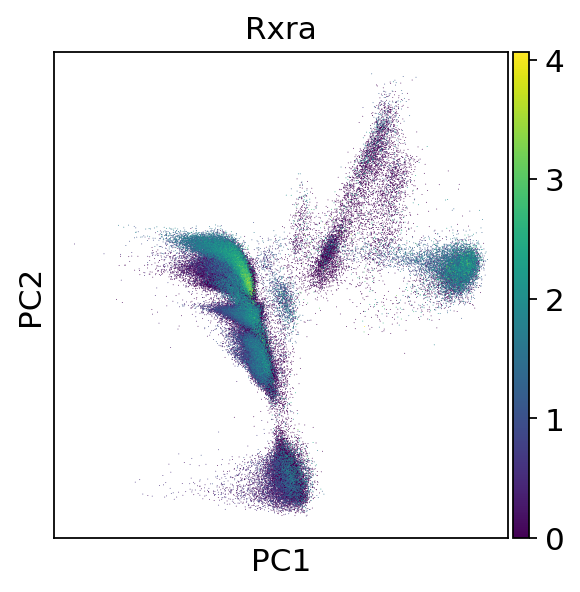

In [49]:
sc.pl.pca(adata_all_annot, color='Rxra')

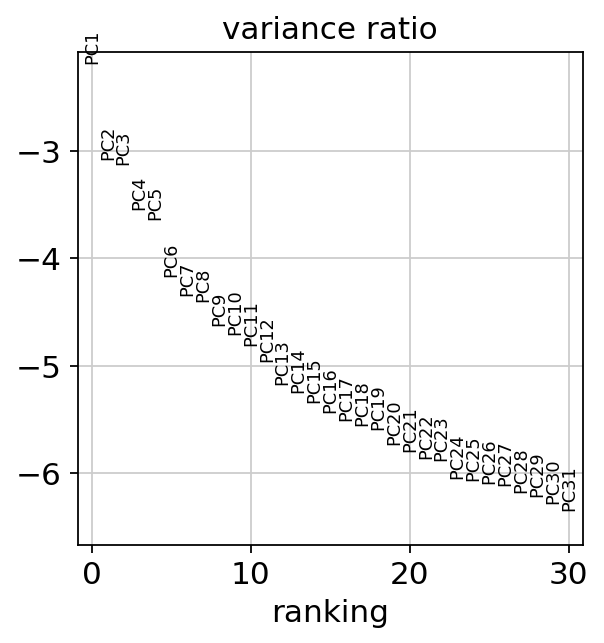

In [50]:
sc.pl.pca_variance_ratio(adata_all_annot, log=True)

In [51]:
adata_all_annot.write(results_file_all)

In [52]:
adata_all_annot

AnnData object with n_obs × n_vars = 185894 × 2611
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

## Embedding the neighborhood graph

In [53]:
sc.pp.neighbors(adata_all_annot, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)


It is recommended embedding the graph in two dimensions using UMAP ([McInnes et al., 2018](https://arxiv.org/abs/1802.03426)), see below. It may be more trajectory-preserving than tSNE and more true to the manifold's overall connectedness. You may occasionally still see disconnected clusters and other types of connection violations. Running usually makes them better:
```Python
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')
```

In [54]:
sc.tl.umap(adata_all_annot)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:26)


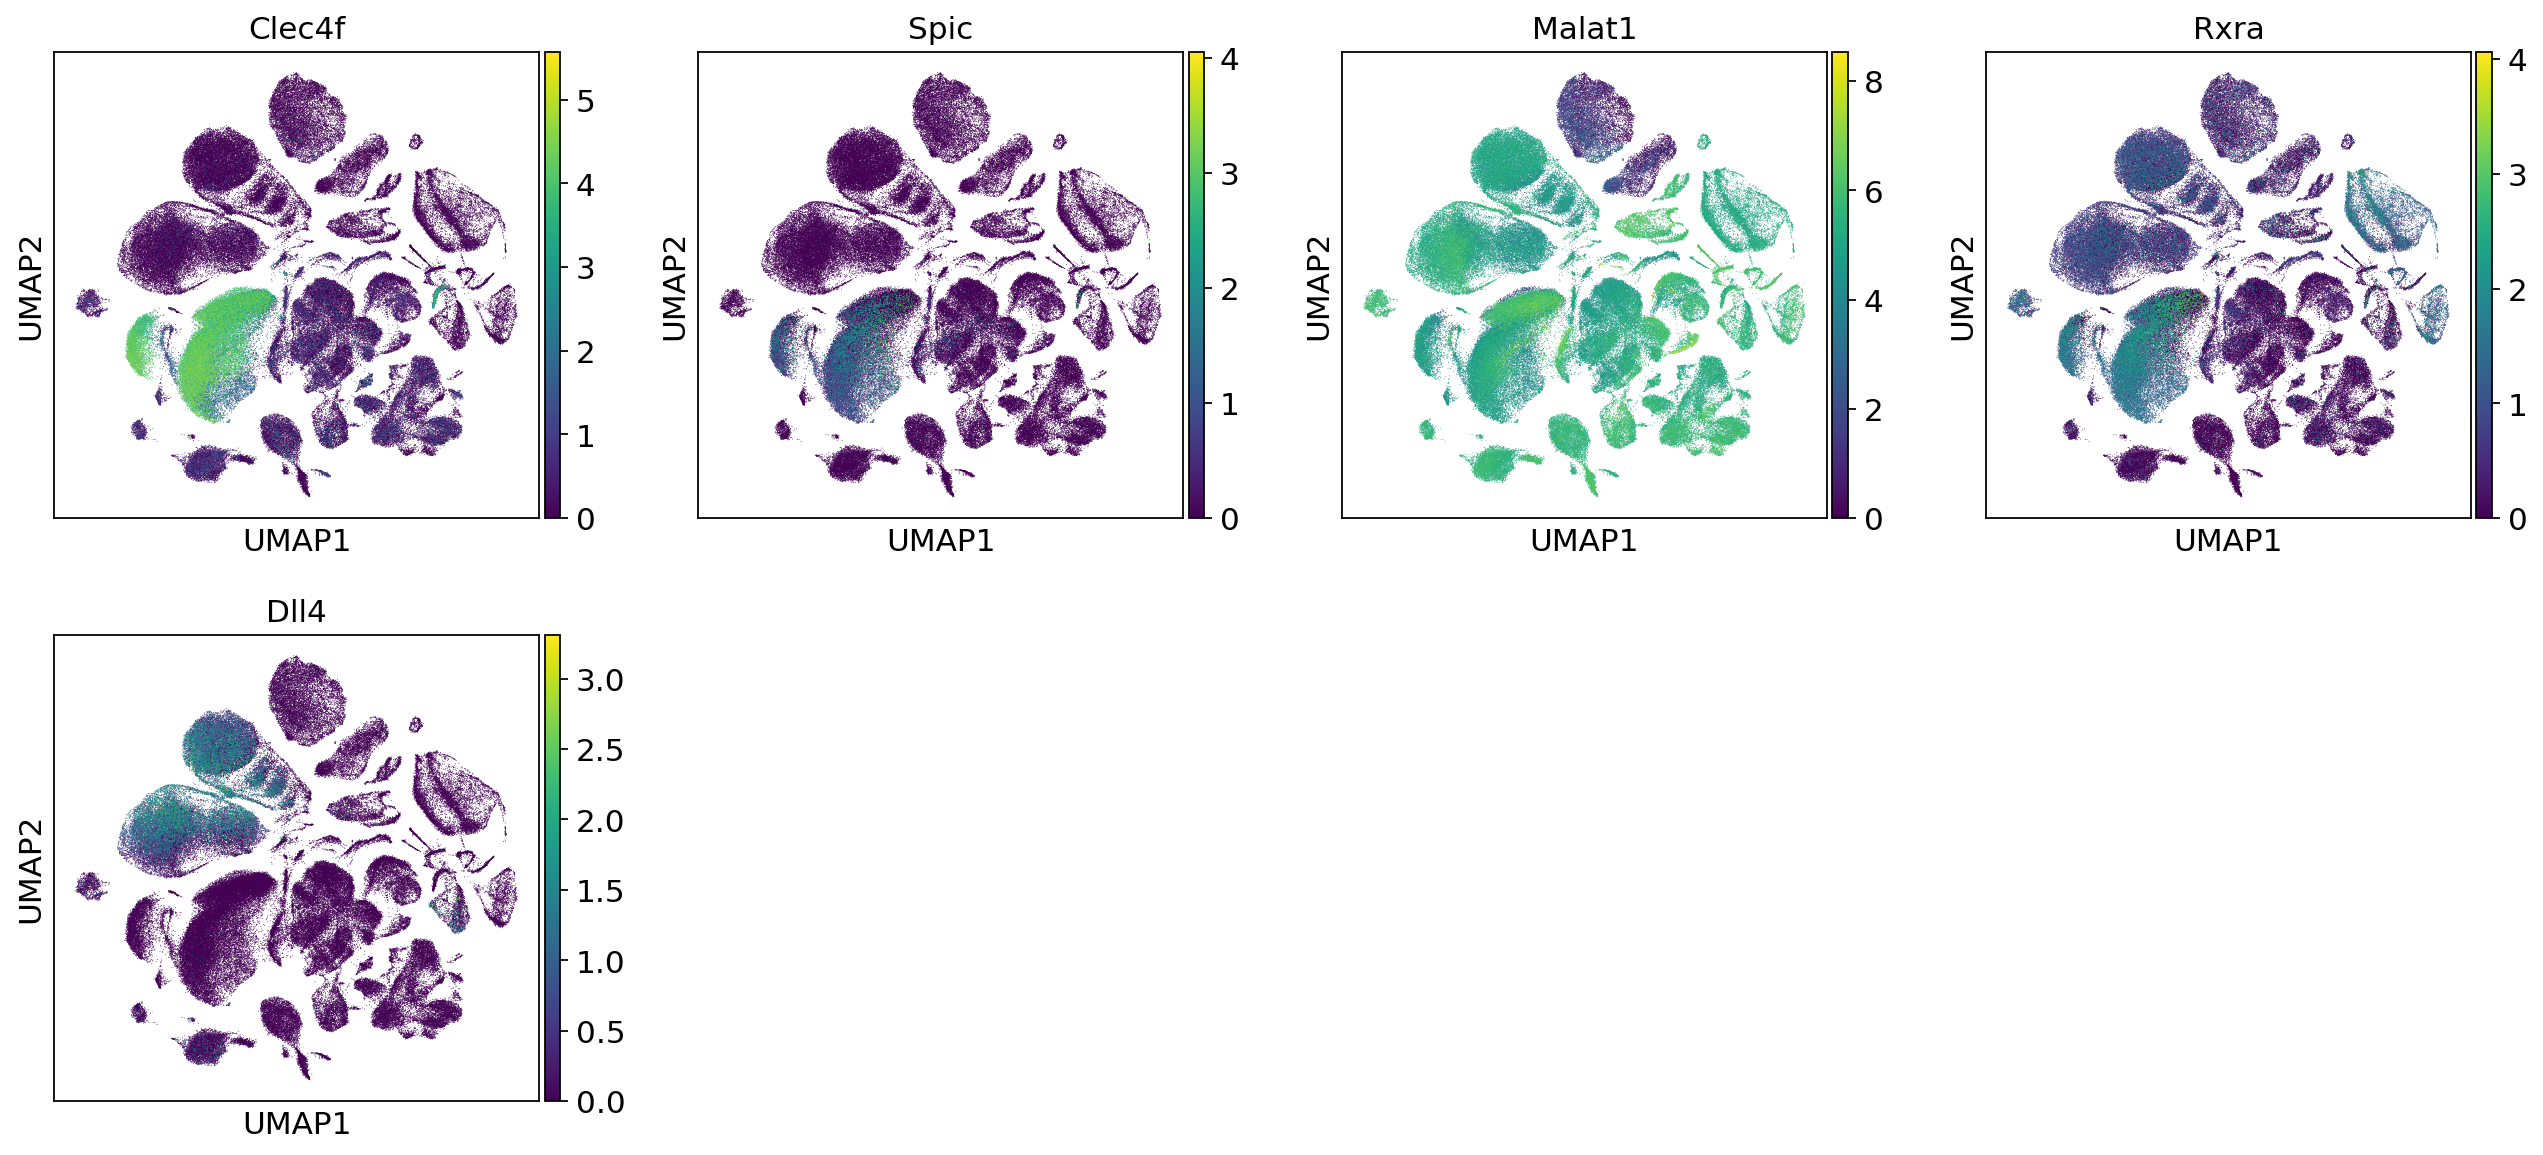

In [55]:
sc.pl.umap(adata_all_annot, color=['Clec4f', 'Spic', 'Malat1','Rxra','Dll4'])